# Unit 10 Lecture 2 - Artificial Intelligence: Unsupervised Learning

CAI 4823: Artificial Intelligence for  Industrial Engineers<br>
University of Central Florida
Dr. Ivan Garibay, Ramya Akula, Mostafa Saeidi, Madeline Schiappa, and Brett Belcher. 

## Notebook Learning Objectives
After studying this notebook students should be able to:
- understand how to apply concepts of unsupervised learning to a real world problem
- Uses external data file "educ_figdp_1_Data.csv"

# Overview

Eurostat is the home of the [European Commission data](http://ec.europa.eu/eurostat). Eurostat’s main role is to process and publish comparable statistical information at European level. Data in Eurostat is provided by each member state. Eurostat's re-use policy is free re-use of its data, both for non-commercial and commercial purposes (with some minor exceptions). Please apply clustering methods to analyze countries according to their education resources.

## Applying clustering to analyze countries according to their education resourses

In order to illustrate the clustering on a real dataset, we will analyze the indicators on education finance data among the European member states, provided by the Eurostat data bank2. The data is organized by year (TIME): [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011] and country (GEO): ['Albania', 'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Euro area (13 countries)', 'Euro area (15 countries)', 'European Union (25 countries)', 'European Union (27 countries)', 'Finland', 'Former Yugoslav Republic of Macedonia, the', 'France', 'Germany (until 1990 former territory of the FRG)', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States']. Twelve indicators (INDIC ED) on education finance with their values (Value) are given like: 

+ 1) Expenditure on educational institutions from private sources as % of Gross Domestic Product (GDP), for all levels of education combined; 
+ 2) Expenditure on educational institutions from public sources as \% of GDP, for all levels of government combined, 
+ 3) Expenditure on educational institutions from public sources as % of total public expenditure, for all levels of education combined, 
+ 4) Public subsidies to the private sector as \% of GDP, for all levels of education combined, 
+ 5) Public subsidies to the private sector as \% of total public expenditure, for all levels of education combined, etc. We can store in a table the 12 indicators for a given year (e.g. 2010).

Let us start having a look at the data.

In [1]:
#Read and check the dataset downloaded from the EuroStat

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn import cluster

edu=pd.read_csv('../Data/educ_figdp_1_Data.csv',na_values=':')
edu.head()

,TIME,GEO,INDIC_ED,Value
0,2002,European Union (27 countries),Total public expenditure on education as % of ...,5.10
1,2002,European Union (27 countries),Total public expenditure on education as % of ...,1.14
2,2002,European Union (27 countries),Total public expenditure on education as % of ...,2.32
3,2002,European Union (27 countries),Total public expenditure on education as % of ...,1.15
4,2002,European Union (27 countries),Total public expenditure on education as % of ...,0.50


In [2]:
edu.tail()

,TIME,GEO,INDIC_ED,Value
4915,2011,Japan,Total public expenditure on education as % of ...,NaN
4916,2011,Japan,Expenditure on educational institutions from p...,NaN
4917,2011,Japan,Public subsidies to the private sector as % of...,NaN
4918,2011,Japan,Expenditure on educational institutions from p...,1.56
4919,2011,Japan,Total public expenditure on education as % of ...,3.67


Data in CSV and databases are often organized in what is called **stacked** or **record** formats. In our case for each year (`TIME`) and country (`GEO`) of the EU as well as some reference countries such as Japan and United States, we have twelve indicators (`INDIC_ED`) on education finance with their values (`Value`). Let us reshape the table into a feature vector style data set. 

To the process of reshaping stacked data into a table is sometimes called **pivoting**.

In [3]:
#Pivot table in order to get a nice feature vector representation with dual indexing by TIME and GEO 
pivedu=pd.pivot_table(edu, values='Value', index=['TIME', 'GEO'], columns=['INDIC_ED'])
pivedu.head()

INDIC_ED       Expenditure on educational institutions from private sources as % of GDP, for all levels of education combined  \
TIME GEO                                                                                                                        
2002 Austria                                                0.38                                                                
     Belgium                                                0.36                                                                
     Bulgaria                                               0.67                                                                
     Croatia                                                0.13                                                                
     Cyprus                                                 1.41                                                                

INDIC_ED       Expenditure on educational institutions from public sources as % of GDP, for all levels of government combined  \
TIME GEO                                                                                                                        
2002 Austria                                                5.30                                                                
     Belgium                                                5.80                                                                
     Bulgaria                                               3.75                                                                
     Croatia                                                3.71                                                                
     Cyprus                                                 5.87                                                                

INDIC_ED       Expenditure on educational institutions from public sources as % of total public expenditure, for all levels of education combined  \
TIME GEO                                                                                                                                            
2002 Austria                                               10.46                                                                                    
     Belgium                                               11.65                                                                                    
     Bulgaria                                               9.49                                                                                    
     Croatia                                                 NaN                                                                                    
     Cyprus                                                14.67                                                                                    

INDIC_ED       Public subsidies to the private sector as % of GDP, for all levels of education combined  \
TIME GEO                                                                                                  
2002 Austria                                                0.37                                          
     Belgium                                                0.29                                          
     Bulgaria                                               0.18                                          
     Croatia                                                 NaN                                          
     Cyprus                                                 0.73                                          

INDIC_ED       Public subsidies to the private sector as % of total public expenditure, for all levels of education combined  \
TIME GEO                                                                                                                       
2002 Austria                                                0.74                                                               
     Belgium  

In [4]:
print ('Let us check the two indices:\n')
print ('\nPrimary index (TIME): \n' + str(pivedu.index.levels[0].tolist()))
print ('\nSecondary index (GEO): \n' + str(pivedu.index.levels[1].tolist()))

Let us check the two indices:


Primary index (TIME): 
[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]

Secondary index (GEO): 
['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Euro area (13 countries)', 'Euro area (15 countries)', 'European Union (25 countries)', 'European Union (27 countries)', 'Finland', 'Former Yugoslav Republic of Macedonia, the', 'France', 'Germany (until 1990 former territory of the FRG)', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States']


Observe that we have ten years information on these indicators, and as expected we have all members of the European Union with some aggregates and control/reference countries. For the sake of simplicity, let us focus on values on year 2010.

In [5]:
#Extract 2010 set of values
edu2010=pivedu.loc[2010]
edu2010.head()


INDIC_ED,"Expenditure on educational institutions from private sources as % of GDP, for all levels of education combined","Expenditure on educational institutions from public sources as % of GDP, for all levels of government combined","Expenditure on educational institutions from public sources as % of total public expenditure, for all levels of education combined","Public subsidies to the private sector as % of GDP, for all levels of education combined","Public subsidies to the private sector as % of total public expenditure, for all levels of education combined","Total public expenditure on education as % of GDP, at pre-primary level of education (ISCED 0) and not allocated by level","Total public expenditure on education as % of GDP, at primary level of education (ISCED 1)","Total public expenditure on education as % of GDP, at secondary level of education (ISCED 2-4)","Total public expenditure on education as % of GDP, at tertiary level of education (ISCED 5-6)","Total public expenditure on education as % of GDP, for all levels of education combined","Total public expenditure on education as % of gross national income, for all levels of education combined","Total public expenditure on education as % of total public expenditure, for all levels of education combined"
GEO,,,,,,,,,,,,
Austria,0.52,5.25,9.98,0.64,1.22,0.61,1.01,2.64,1.63,5.89,5.90,11.20
Belgium,0.34,6.25,11.90,0.32,0.61,0.78,1.54,2.79,1.46,6.57,6.44,12.51
Bulgaria,0.63,3.35,8.96,0.74,1.99,0.92,0.80,1.76,0.61,4.10,4.18,10.95
Croatia,0.26,4.24,NaN,0.03,NaN,0.65,1.87,0.97,0.78,4.27,4.42,NaN
Cyprus,1.61,6.73,14.59,1.19,2.57,0.40,2.26,3.14,2.12,7.92,8.18,17.16


Let us clean and store the names of the features and the countries.

In [6]:
#Store column names and clear them for better handling. Do the same with countries
edu2010 = edu2010.rename(index={'Euro area (13 countries)': 'EU13',
                                'Euro area (15 countries)': 'EU15',
                                'European Union (25 countries)': 'EU25',
                                'European Union (27 countries)': 'EU27',
                                'Former Yugoslav Republic of Macedonia, the': 'Macedonia',
                                'Germany (until 1990 former territory of the FRG)': 'Germany'
                        })
features = edu2010.columns.tolist()

countries = edu2010.index.tolist()

edu2010.columns=range(12)
edu2010

,0,1,2,3,4,5,6,7,8,9,10,11
GEO,,,,,,,,,,,,
Austria,0.52,5.25,9.98,0.64,1.22,0.61,1.01,2.64,1.63,5.89,5.90,11.20
Belgium,0.34,6.25,11.90,0.32,0.61,0.78,1.54,2.79,1.46,6.57,6.44,12.51
Bulgaria,0.63,3.35,8.96,0.74,1.99,0.92,0.80,1.76,0.61,4.10,4.18,10.95
Croatia,0.26,4.24,NaN,0.03,NaN,0.65,1.87,0.97,0.78,4.27,4.42,NaN
Cyprus,1.61,6.73,14.59,1.19,2.57,0.40,2.26,3.14,2.12,7.92,8.18,17.16
Czech Republic,0.57,4.11,9.39,0.14,0.32,0.63,0.69,1.98,0.96,4.25,4.59,9.71
Denmark,0.44,7.51,13.02,1.29,2.24,1.27,2.08,3.04,2.41,8.80,8.60,15.26
Estonia,0.41,5.40,13.27,0.28,0.69,0.47,1.40,2.58,1.23,5.68,6.02,13.96
EU13,0.61,5.06,9.75,0.32,0.61,0.55,1.11,2.35,1.29,5.29,5.28,10.43


As we can observe, this is not a clean data set, there are missing values. Some countries may not collect or have access to some indicators and there are countries without any indicators. Let us display this effect.

array([0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 6,
       0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 3])

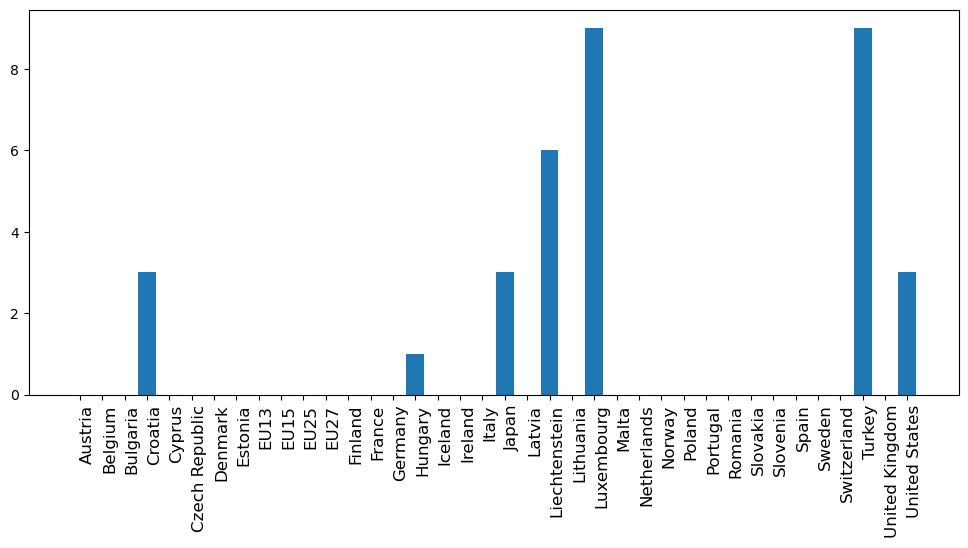

In [7]:
#Check what is going on in the NaN data 
nan_countries=np.sum(np.where(edu2010.isnull(),1,0),axis=1)
plt.bar(np.arange(nan_countries.shape[0]),nan_countries)
plt.xticks(np.arange(nan_countries.shape[0]),countries,rotation=90,horizontalalignment='left',
           fontsize=12)
fig = plt.gcf()
fig.set_size_inches((12,5))
nan_countries

We don't have info on Albania, Macedonia and Greece (countries not in our data), and very limited info from Liechtenstein, Luxembourg and Turkey. So let us work without them. Now let us check the features.

[1 0 3 0 3 0 0 0 0 0 0 3]


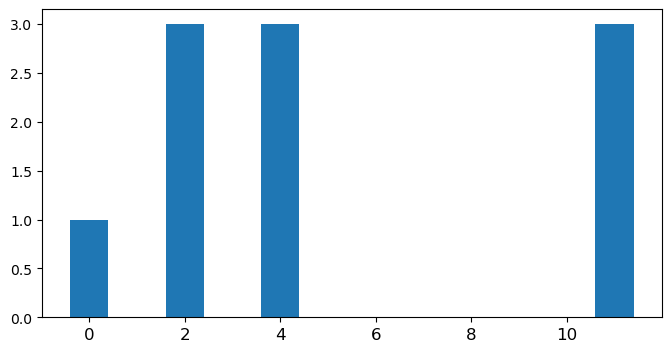

In [8]:
#Remove countries with more than 4 NaNs = Turkey, Luxenburg,  Liechtenstein
wrk_countries = nan_countries<4

educlean=edu2010.loc[wrk_countries] #.ix - Construct an open mesh from multiple sequences.

#Let us check the features we have
na_features = np.sum(np.where(educlean.isnull(),1,0),axis=0)
print (na_features)

plt.bar(np.arange(na_features.shape[0]),na_features)
plt.xticks(fontsize=12)
fig = plt.gcf()
fig.set_size_inches((8,4))

There are four features with missing data. At this point we can proceed in two ways:

+ **Fill in** the features with some non-informative, non-biasing data.
+ **Drop** the features with missing values.

If we have many features and only a few have missing values then it is not much harmful to drop them. However, if missing values are spread across the features, we have to eventually deal with them. In our case, both options seem reasonable, so we will proceed with both at the same time.

In [9]:
#Option A fills those features with some value, at risk of extracting wrong information
#Constant filling : edufill0=educlean.fillna(0)
edufill=educlean.fillna(educlean.mean())
print ('Filled in data shape: ' + str(edufill.shape))

#Option B drops those features
edudrop=educlean.dropna(axis=1) 
         #dropna: Return object with labels on given axis omitted where alternately any or 
          # all of the data are missing
print ('Drop data shape: ' + str(edudrop.shape))



Filled in data shape: (35, 12)
Drop data shape: (35, 8)


In the fill-in option, we have decided to **fill the data with the mean value** of the feature. This will not bias the distribution of the feature, though it has consequences in the interpretation of the results. 

Let us now apply a K-means clustering technique on this data in order to partition the countries according to their investment in education and check their profiles.

In [10]:
scaler = StandardScaler() #Standardize features by removing the mean and scaling to unit variance

X_train_fill = edufill.values
X_train_fill = scaler.fit_transform(X_train_fill)

clf = cluster.KMeans(init='k-means++', n_clusters=3, random_state=42)
    
clf.fit(X_train_fill) #Compute k-means clustering.

y_pred_fill = clf.predict(X_train_fill) 
        #Predict the closest cluster each sample in X belongs to.

idx=y_pred_fill.argsort()
y_pred_fill

array([0, 0, 2, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 0,
       1, 0, 1, 0, 0, 2, 2, 0, 2, 1, 0, 1, 0], dtype=int32)

Let's visualize the result of the K-means clustering:

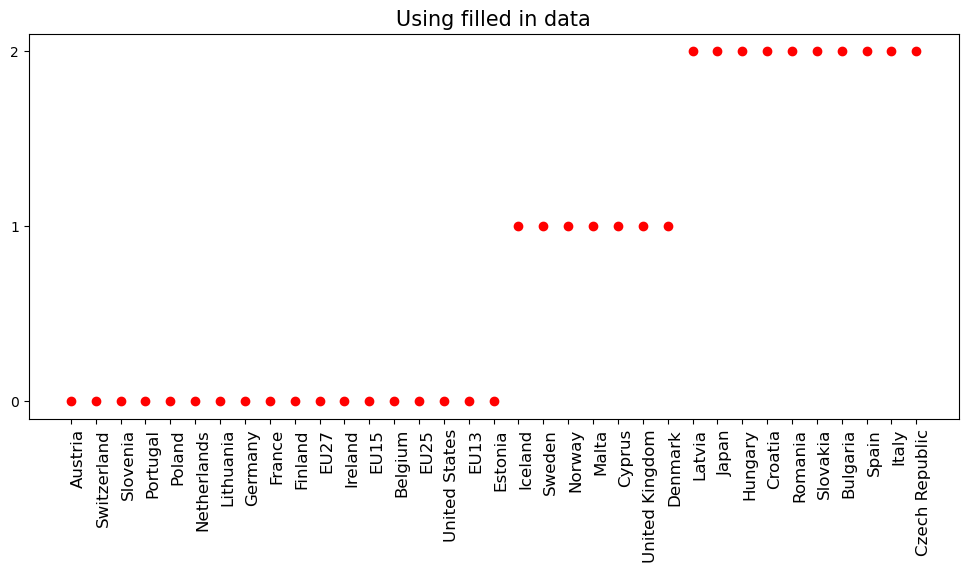

In [11]:
plt.plot(np.arange(35),y_pred_fill[idx],'ro')
wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]

plt.xticks(np.arange(len(wrk_countries_names)),[wrk_countries_names[i] for i in idx],
           rotation=90,horizontalalignment='left',fontsize=12)
plt.title('Using filled in data', size=15)
plt.yticks([0,1,2])
fig = plt.gcf()

fig.set_size_inches((12,5))

Let's apply the clustering on the dataset with dropped missing values:

In [12]:
X_train_drop = edudrop.values
X_train_drop = scaler.fit_transform(X_train_drop)
    
clf.fit(X_train_drop) #Compute k-means clustering.
y_pred_drop = clf.predict(X_train_drop) #Predict the closest cluster of each sample in X.

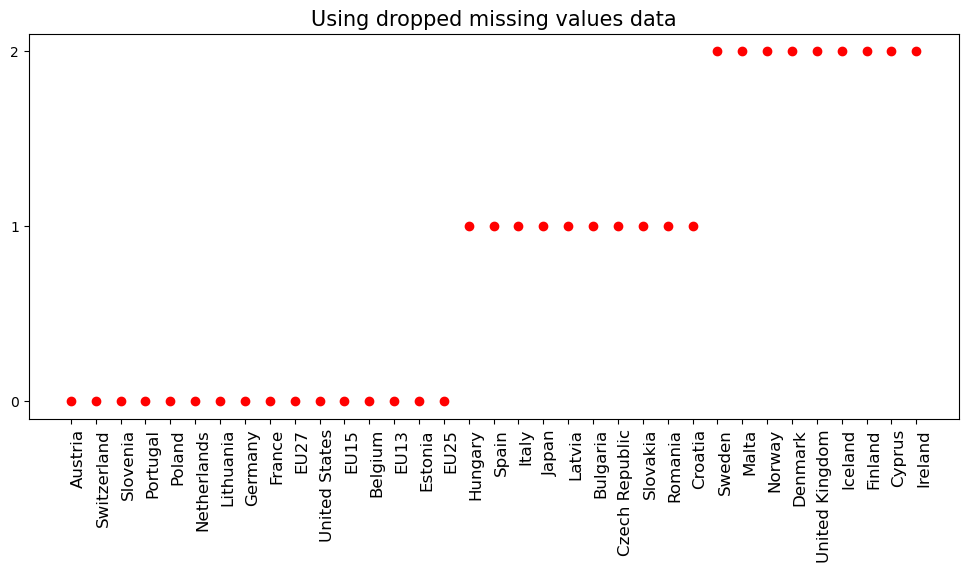

In [13]:
idx=y_pred_drop.argsort()
plt.plot(np.arange(35),y_pred_drop[idx],'ro')
wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]

plt.xticks(np.arange(len(wrk_countries_names)),[wrk_countries_names[i] for i in idx],
           rotation=90,horizontalalignment='left',fontsize=12)
plt.title('Using dropped missing values data',size=15)
fig = plt.gcf()
plt.yticks([0,1,2])
fig.set_size_inches((12,5))


We have sorted the data for better visualization. At a simple glance we can see that both partitions can be different. We can better check this effect plotting the clusters values of one technique against the other.

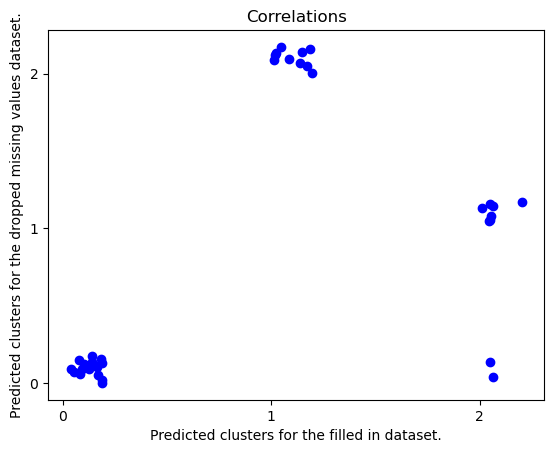

In [14]:
plt.plot(y_pred_drop+0.2*np.random.rand(35),y_pred_fill+0.2*np.random.rand(35),'bo')
plt.xlabel('Predicted clusters for the filled in dataset.')
plt.ylabel('Predicted clusters for the dropped missing values dataset.')
plt.title('Correlations')
plt.xticks([0,1,2])
plt.yticks([0,1,2])
plt.savefig("../Output/correlationkmeans.png",dpi=300, bbox_inches='tight')


Well, looking at both methods, both may yield the same results, but not necessarily always. This is mainly due to two aspects: the random initialization of the k-means clustering and the fact that each method works in a different space (dropped data vs filled-in data). 

Let us check the list of countries in both methods. Note that we should not consider the cluster value, since it is irrelevant.

In [15]:
print ('Cluster 0-fill: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_fill)
                             if item==0]))
print ('\n')
print ('Cluster 0-drop: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_drop) 
                             if item==0]))
print ('\n')
print ('Cluster 1-fill: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_fill) 
                             if item==1]))
print ('\n')
print ('Cluster 1-drop: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_drop) 
                             if item==1]))
print ('\n')
print ('Cluster 2-fill: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_fill) 
                             if item==2]))
print ('\n')
print ('Cluster 2-drop: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_drop) 
                             if item==2]))
print ('\n')


Cluster 0-fill: 
['Austria', 'Belgium', 'Estonia', 'EU13', 'EU15', 'EU25', 'EU27', 'Finland', 'France', 'Germany', 'Ireland', 'Lithuania', 'Netherlands', 'Poland', 'Portugal', 'Slovenia', 'Switzerland', 'United States']


Cluster 0-drop: 
['Austria', 'Belgium', 'Estonia', 'EU13', 'EU15', 'EU25', 'EU27', 'France', 'Germany', 'Lithuania', 'Netherlands', 'Poland', 'Portugal', 'Slovenia', 'Switzerland', 'United States']


Cluster 1-fill: 
['Cyprus', 'Denmark', 'Iceland', 'Malta', 'Norway', 'Sweden', 'United Kingdom']


Cluster 1-drop: 
['Bulgaria', 'Croatia', 'Czech Republic', 'Hungary', 'Italy', 'Japan', 'Latvia', 'Romania', 'Slovakia', 'Spain']


Cluster 2-fill: 
['Bulgaria', 'Croatia', 'Czech Republic', 'Hungary', 'Italy', 'Japan', 'Latvia', 'Romania', 'Slovakia', 'Spain']


Cluster 2-drop: 
['Cyprus', 'Denmark', 'Finland', 'Iceland', 'Ireland', 'Malta', 'Norway', 'Sweden', 'United Kingdom']




Let us check the profile of the clusters by looking at the centroids:

[[ 0.06240308 -0.29062115 -0.22607748 -0.20423861  0.14926142  0.02656748
  -0.05405708 -0.11871263]
 [-1.08730711 -0.63832861  0.32087421 -0.69019635 -1.14664783 -1.07406157
  -1.10074243 -1.02534289]
 [ 1.0971802   1.22591384  0.04538862  1.12997571  1.0086995   1.14617066
   1.31914862  1.35031454]]


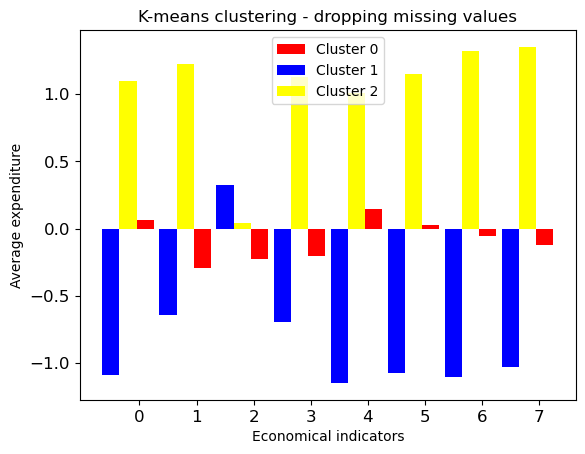

In [16]:
width=0.3
print(clf.cluster_centers_) # dropped values version
p1 = plt.bar(np.arange(8),clf.cluster_centers_[1],width,color='b')
#p1 = plt.bar(np.arange(8),scaler.inverse_transform(clf.cluster_centers_[1]),width,color='b')
p2 = plt.bar(np.arange(8)+width,clf.cluster_centers_[2],
             width,color='yellow')
p0 = plt.bar(np.arange(8)+2*width,clf.cluster_centers_[0],
             width,color='r')

plt.legend( (p0[0], p1[0], p2[0]), ('Cluster 0', 'Cluster 1', 'Cluster 2') ,loc=9)
plt.xticks(np.arange(8) + 0.5, np.arange(8),size=12)
plt.yticks(size=12)
plt.xlabel('Economical indicators')
plt.ylabel('Average expenditure')
plt.title('K-means clustering - dropping missing values')
fig = plt.gcf()

plt.savefig("../Output/clusterexpenditure.png",dpi=300, bbox_inches='tight')


It looks like cluster `1` spends more on education while cluster `0` is the one with less resources on education. What about USA?

Let us refine a little bit more cluster `0` and check how close are members from this cluster to cluster `1`. This may give us a hint on a possible ordering. 

([<matplotlib.axis.XTick at 0x17d15b140>,
 [Text(0, 0, 'Austria'),
  Text(1, 0, 'Belgium'),
  Text(2, 0, 'Estonia'),
  Text(3, 0, 'EU13'),
  Text(4, 0, 'EU15'),
  Text(5, 0, 'EU25'),
  Text(6, 0, 'EU27'),
  Text(7, 0, 'France'),
  Text(8, 0, 'Germany'),
  Text(9, 0, 'Lithuania'),
  Text(10, 0, 'Netherlands'),
  Text(11, 0, 'Poland'),
  Text(12, 0, 'Portugal'),
  Text(13, 0, 'Slovenia'),
  Text(14, 0, 'Switzerland'),
  Text(15, 0, 'United States')])

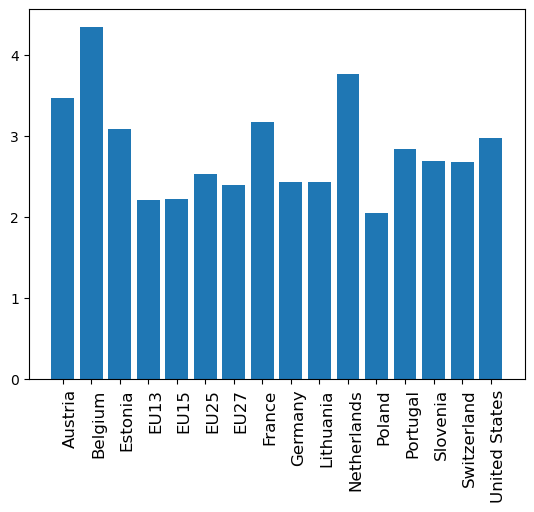

In [17]:
from scipy.spatial import distance
p = distance.cdist(X_train_drop[y_pred_drop==0,:],[clf.cluster_centers_[1]],'euclidean') 
                  #the distance of the elements of cluster 0 to the center of cluster 1
p = p.flatten()
plt.bar(np.arange(len(p)),p)

wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]
zero_countries_names = [wrk_countries_names[i] for i,item in enumerate(y_pred_drop) 
                        if item==0]
plt.xticks(np.arange(len(zero_countries_names)),zero_countries_names,rotation=90,
           horizontalalignment='left',fontsize=12)



Well, it seems that Spain belongs to cluster `0`, it is the closest to change to a policy in the lines of the other clusters.

Additionally, we can also check the distance to the centroid of cluster `0`.

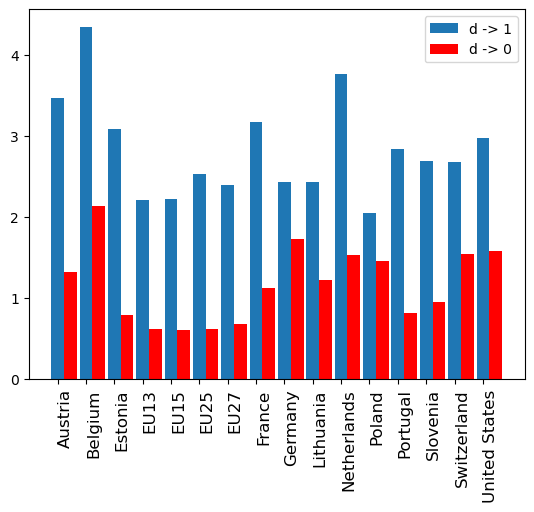

In [18]:
from scipy.spatial import distance
p = distance.cdist(X_train_drop[y_pred_drop==0,:],[clf.cluster_centers_[1]],'euclidean').flatten()
pown = distance.cdist(X_train_drop[y_pred_drop==0,:],[clf.cluster_centers_[0]],'euclidean').flatten()

width=0.45
p0=plt.bar(np.arange(p.shape[0]),p,width)
p1=plt.bar(np.arange(p.shape[0])+width,pown,width,color = 'red')

wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]
zero_countries_names = [wrk_countries_names[i] for i,item in enumerate(y_pred_drop) 
                        if item==0]
plt.xticks(np.arange(len(zero_countries_names)),zero_countries_names,rotation=90,
           horizontalalignment='left',fontsize=12)
plt.legend( (p0[0], p1[0]), ('d -> 1', 'd -> 0') ,loc=1)
plt.savefig("../Output/dist2cluster01.png",dpi=300, bbox_inches='tight')


Let us redo the clustering with $K=4$ and see what we can conclude.

In [19]:
X_train = edudrop.values
clf = cluster.KMeans(init='k-means++', n_clusters=4, random_state=0)
clf.fit(X_train)
y_pred = clf.predict(X_train)

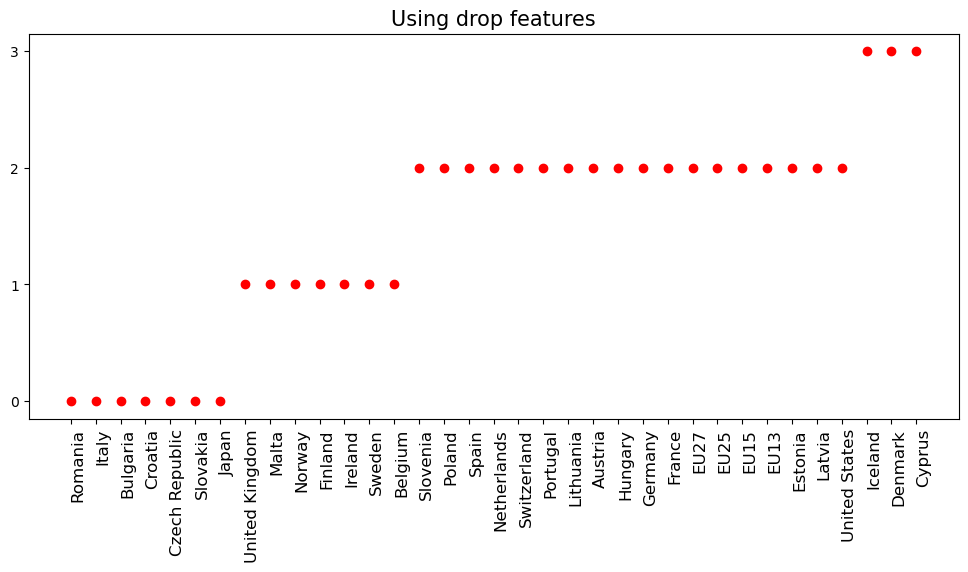

In [20]:
idx=y_pred.argsort()
plt.plot(np.arange(35),y_pred[idx],'ro')
wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]

plt.xticks(np.arange(len(wrk_countries_names)),[wrk_countries_names[i] for i in idx],rotation=90,
           horizontalalignment='left',fontsize=12)
plt.title('Using drop features',size=15)
plt.yticks([0,1,2,3])
fig = plt.gcf()
fig.set_size_inches((12,5))

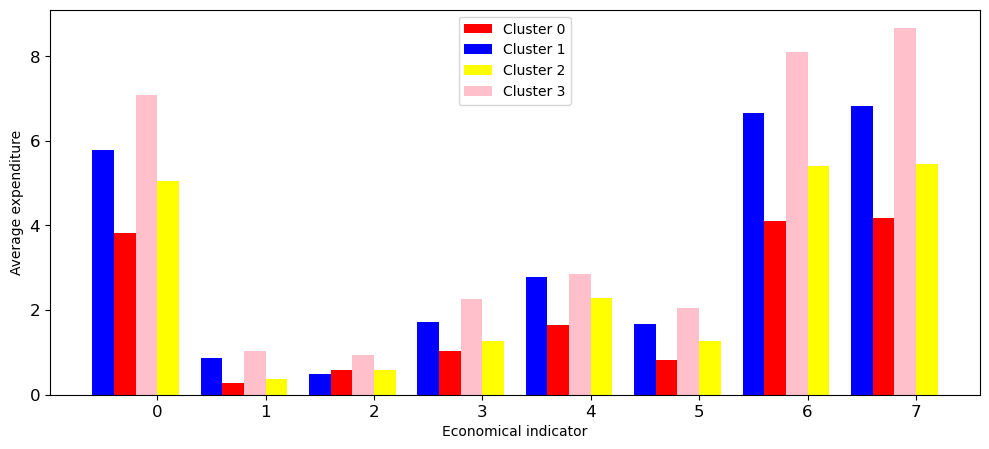

In [21]:
width=0.2
p0 = plt.bar(np.arange(8)+1*width,clf.cluster_centers_[0],width,color='r')
p1 = plt.bar(np.arange(8),clf.cluster_centers_[1],width,color='b')
p2 = plt.bar(np.arange(8)+3*width,clf.cluster_centers_[2],width,color='yellow')
p3 = plt.bar(np.arange(8)+2*width,clf.cluster_centers_[3],width,color='pink')

plt.legend( (p0[0], p1[0], p2[0], p3[0]), ('Cluster 0', 'Cluster 1', 'Cluster 2', 
                                           'Cluster 3') ,loc=9)
plt.xticks(np.arange(8) + 0.5, np.arange(8),size=12)
plt.yticks(size=12)
plt.xlabel('Economical indicator')
plt.ylabel('Average expenditure')
fig = plt.gcf()
fig.set_size_inches((12,5))
plt.savefig("../Output/distances4clusters.png",dpi=300, bbox_inches='tight')


Spain is still in cluster `0`. But as we observed in our previous clustering it was very close to changing cluster. This time cluster `0` includes the averages values for the EU members. Just for the sake of completeness, let us write down the name of the countries in the clusters.

In [22]:
print ('Cluster 0: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred) if item==0]))

print ('Cluster 1: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred) if item==1]))

print ('Cluster 2: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred) if item==2]))

print ('Cluster 3: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred) if item==3]))

#Save data for future use.
import pickle
ofname = open('edu2010.pkl', 'wb')
s = pickle.dump([edu2010, wrk_countries_names,y_pred ],ofname)
ofname.close()

Cluster 0: 
['Bulgaria', 'Croatia', 'Czech Republic', 'Italy', 'Japan', 'Romania', 'Slovakia']
Cluster 1: 
['Belgium', 'Finland', 'Ireland', 'Malta', 'Norway', 'Sweden', 'United Kingdom']
Cluster 2: 
['Austria', 'Estonia', 'EU13', 'EU15', 'EU25', 'EU27', 'France', 'Germany', 'Hungary', 'Latvia', 'Lithuania', 'Netherlands', 'Poland', 'Portugal', 'Slovenia', 'Spain', 'Switzerland', 'United States']
Cluster 3: 
['Cyprus', 'Denmark', 'Iceland']


We can repeat the process using the alternative clustering techniques and compare their results. Let us first apply the spectral clustering. The corresponding code will be:

In [23]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import euclidean_distances

X = StandardScaler().fit_transform(edudrop.values)
 
distances = euclidean_distances(edudrop.values)
    
spectral = cluster.SpectralClustering(n_clusters=4, affinity="nearest_neighbors")
spectral.fit(edudrop.values)
 
y_pred = spectral.labels_.astype(int)

If we visualize the results:

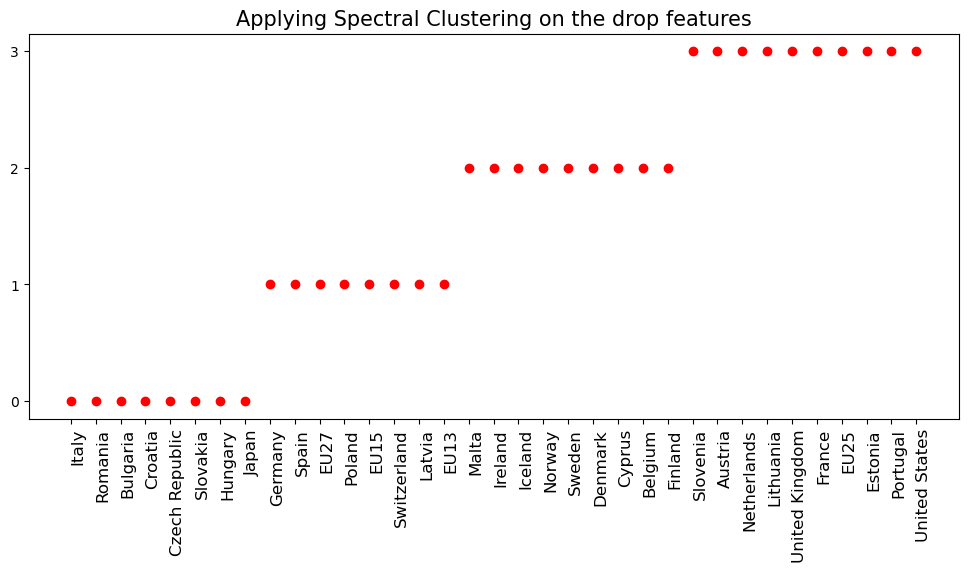

In [24]:
idx=y_pred.argsort()

plt.plot(np.arange(35),y_pred[idx],'ro')
wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]

plt.xticks(np.arange(len(wrk_countries_names)),[wrk_countries_names[i] 
        for i in idx],rotation=90,horizontalalignment='left',fontsize=12)

plt.yticks([0,1,2,3])

plt.title('Applying Spectral Clustering on the drop features',size=15)
fig = plt.gcf()
fig.set_size_inches((12,5))

Note that in general, the spectral clustering intends to obtain more balanced clusters. In this way, the predicted cluster 1 merges the cluster 2 and 3 of the K-means clustering, cluster 2 corresponds to the cluster 1 of the K-means clustering, cluster 0 mainly goes to cluster 2, and clusters 3 corresponds to cluster 0 of the K-means.

Applying the agglomerative clustering, we obtain not only the different clusters, but also we can see how different clusters are obtained. This, in some way it is giving us information on which are the pairs of countries and clusters that are most similar. The corresponding code that applies the agglomerative clustering is:

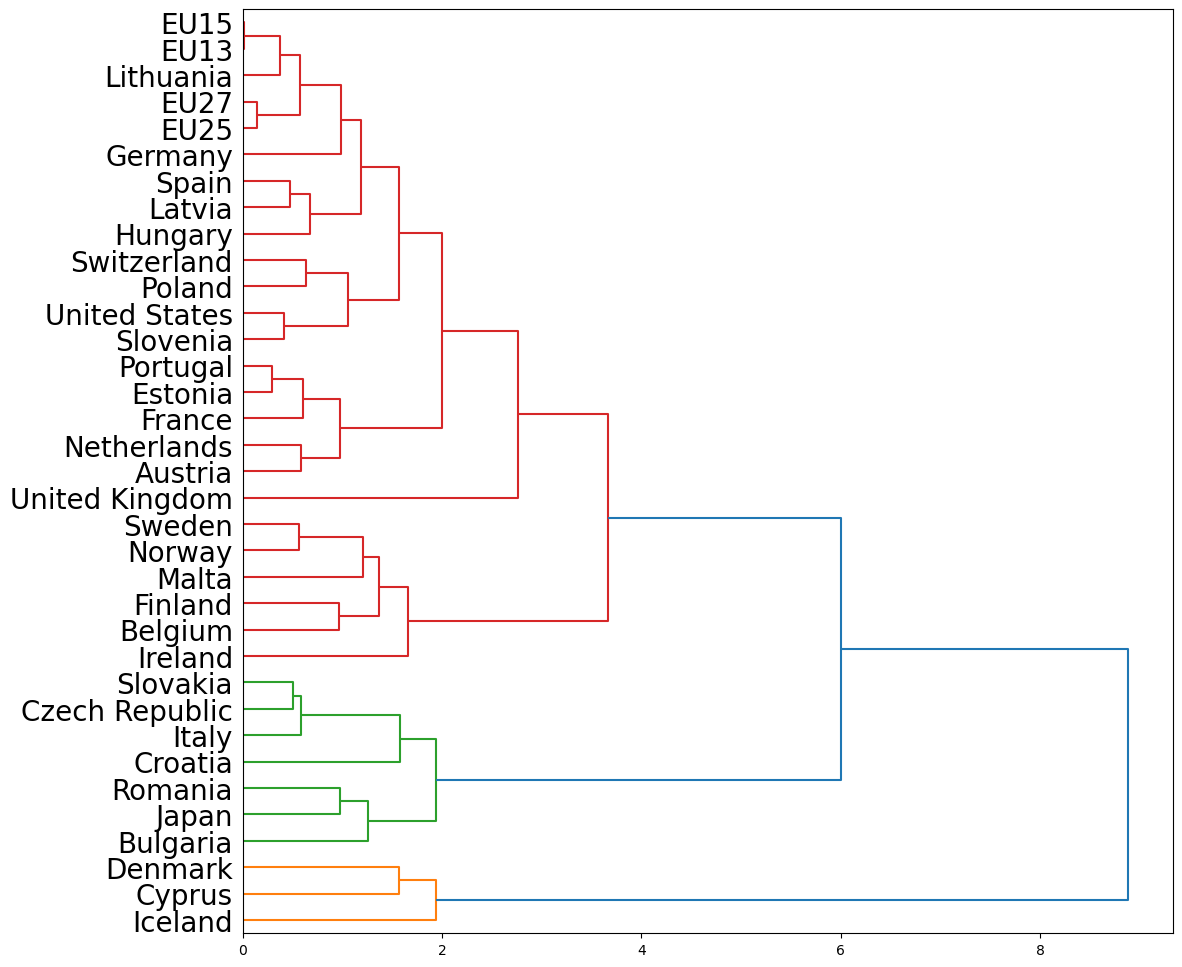

In [25]:
X_train = edudrop.values
dist = pdist(X_train,'euclidean')
linkage_matrix = linkage(dist,method = 'complete');
plt.figure()  # we need a tall figure
fig = plt.gcf()
fig.set_size_inches((12,12))
dendrogram(linkage_matrix, orientation="right", color_threshold = 4,labels = wrk_countries_names, leaf_font_size=20);

plt.savefig("../Output/ACCountires.png",dpi=300, bbox_inches='tight')
plt.show()

#plt.tight_layout()  # fixes margins


In scikit-learn, the parameter color\_threshold colors all the descendent links below a cluster node k the same color if k is the first node below the color threshold. All links connecting nodes with distances greater than or equal to the threshold are colored blue. Thus, if we use color threshold = 3, the obtained clusters are as follows:

+ Cluster 0: ['Cyprus', 'Denmark', 'Iceland']
+ Cluster 1: ['Bulgaria', 'Croatia', 'Czech Republic', 'Italy', 'Japan', 'Romania', 'Slovakia']
+ Cluster 2: ['Belgium', 'Finland', 'Ireland', 'Malta', 'Norway', 'Sweden']
+ Cluster 3: ['Austria', 'Estonia', 'EU13', 'EU15', 'EU25', 'EU27', 'France', 'Germany', 'Hungary', 'Latvia', 'Lithuania', 'Netherlands', 'Poland', 'Portugal', 'Slovenia', 'Spain', 'Switzerland', 'United Kingdom', 'United States']

Note that they correspond in high degree to the clusters obtained by the K-means (except permutation of clusters labels that is irrelevant). The figure shows the construction of the clusters using the complete linkage agglomerative clustering. Different cuts at different levels of the dendrogram allow to obtain different number of clusters. As a summary, let us compare the results of the three approaches of clustering. We cannot expect that the results coincide since different approaches are based on different criteria to construct the clusters. Still, we can observe that in this case K-means and the agglomerative approaches gave the same results (up to a permutation of the number of cluster that is irrelevant), meanwhile the spectral clustering gave more evenly distributed clusters. It fused cluster 0 and 2 of the agglomerative clustering in cluster 1, and split cluster 3 of agglomerative clustering in clusters 0 and 3 of it. Note that these results can change when using different distance between data.

# References

1. Scikit-Learn, Python Library for Machine Learning, http://scikit-learn.org/stable/index.html

_Last updated on 10.26.22 5:40pm<br>
(C) 2022 Complex Adaptive Systems Laboratory all rights reserved._